# **Predictive Analytics - Prediksi Obesitas**

## Deskripsi Proyek

Proyek ini bertujuan untuk memprediksi tingkat obesitas berdasarkan berbagai fitur seperti . Data  akan digunakan untuk melatih beberapa model machine learning, termasuk Decision Tree Classifier, XGBoost, Random Forest Classifier. Hasil dari model-model tersebut akan dibandingkan dan dievaluasi untuk memilih model yang paling tepat dalam memprediksi tingkat obesitas dengan tingkat kesalahan yang minimal dan val.


*Dataset yang digunakan pada proyek ini:*  
https://www.kaggle.com/competitions/playground-series-s4e2/data


| **Variable**                  | **Description**                                 | **Variable**        | **Description**                          |
|:------------------------------|:------------------------------------------------|:--------------------|:-----------------------------------------|
| **ID**                        | Unique identifier                               | **NCP**             | Number of main meals                     |
| **Gender**                    | Gender                                          | **CAEC**            | Consumption of food between meals        |
| **Age**                       | Age (years)                                     | **SMOKE**           | Smoker or not                            |
| **Height**                    | Height (meters)                                 | **CH2O**            | Consumption of water daily               |
| **Weight**                    | Weight (kilograms)                              | **SCC**             | Calories consumption monitoring          |
| **family_history_with_overweight** | Family history of overweight            | **FAF**             | Physical activity frequency              |
| **FAVC**                      | Frequent consumption of high caloric food       | **TUE**             | Time using technology devices            |
| **FCVC**                      | Frequency of consumption of vegetables          | **CALC**            | Consumption of alcohol                   |
| **MTRANS**                    | Transportation used                             | **NObeyesdad**     | Obesity level deducted                   |


## Import Library


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler, LabelEncoder

from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings("ignore")

## Data Understanding

### Gathering Data


In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [4]:
# return the first three rows of training data
train.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight


In [5]:
# return the first three rows of testing data
test.head(3)

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,20758,Male,26.899886,1.848294,120.644178,yes,yes,2.938616,3.0,Sometimes,no,2.825629,no,0.8554,0.000000,Sometimes,Public_Transportation
1,20759,Female,21.000000,1.600000,66.000000,yes,yes,2.000000,1.0,Sometimes,no,3.000000,no,1.0000,0.000000,Sometimes,Public_Transportation
2,20760,Female,26.000000,1.643355,111.600553,yes,yes,3.000000,3.0,Sometimes,no,2.621877,no,0.0000,0.250502,Sometimes,Public_Transportation


### Assessing Data

#### Dataset Information

In [6]:
# training set shape
train.shape

(20758, 18)

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

#### Checking Missing Value


In [8]:
# checking if there are missing values
print("Is there any missing values?")
train.isna().any()

Is there any missing values?


id                                False
Gender                            False
Age                               False
Height                            False
Weight                            False
family_history_with_overweight    False
FAVC                              False
FCVC                              False
NCP                               False
CAEC                              False
SMOKE                             False
CH2O                              False
SCC                               False
FAF                               False
TUE                               False
CALC                              False
MTRANS                            False
NObeyesdad                        False
dtype: bool

#### Checking Duplicate Data


In [9]:
# checking if there duplicated data
print("The number of duplicated data:", train.duplicated().sum())

The number of duplicated data: 0


#### Statistic Description

In [10]:
# summary statistics
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [11]:
# calculate the BMI value
train["BMI"] = train["Weight"] / train["Height"]**2

### Exploratory Data Analysis (EDA)

#### 1. Correlation Matrix

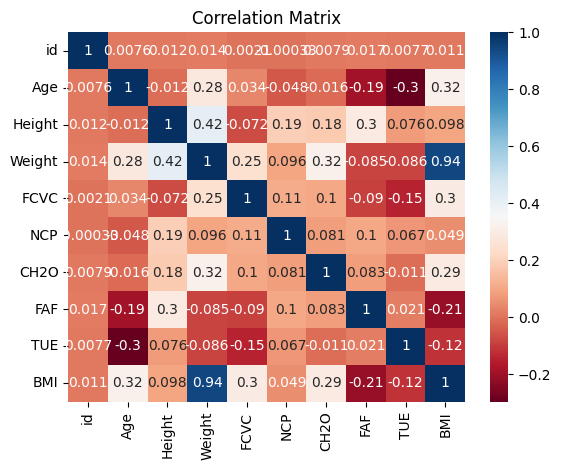

In [12]:
# correlation matrix
corr = train.select_dtypes("number").corr()

sns.heatmap(corr, annot=True, cmap="RdBu")
plt.title("Correlation Matrix")
plt.show()

#### 2. Data Distibution

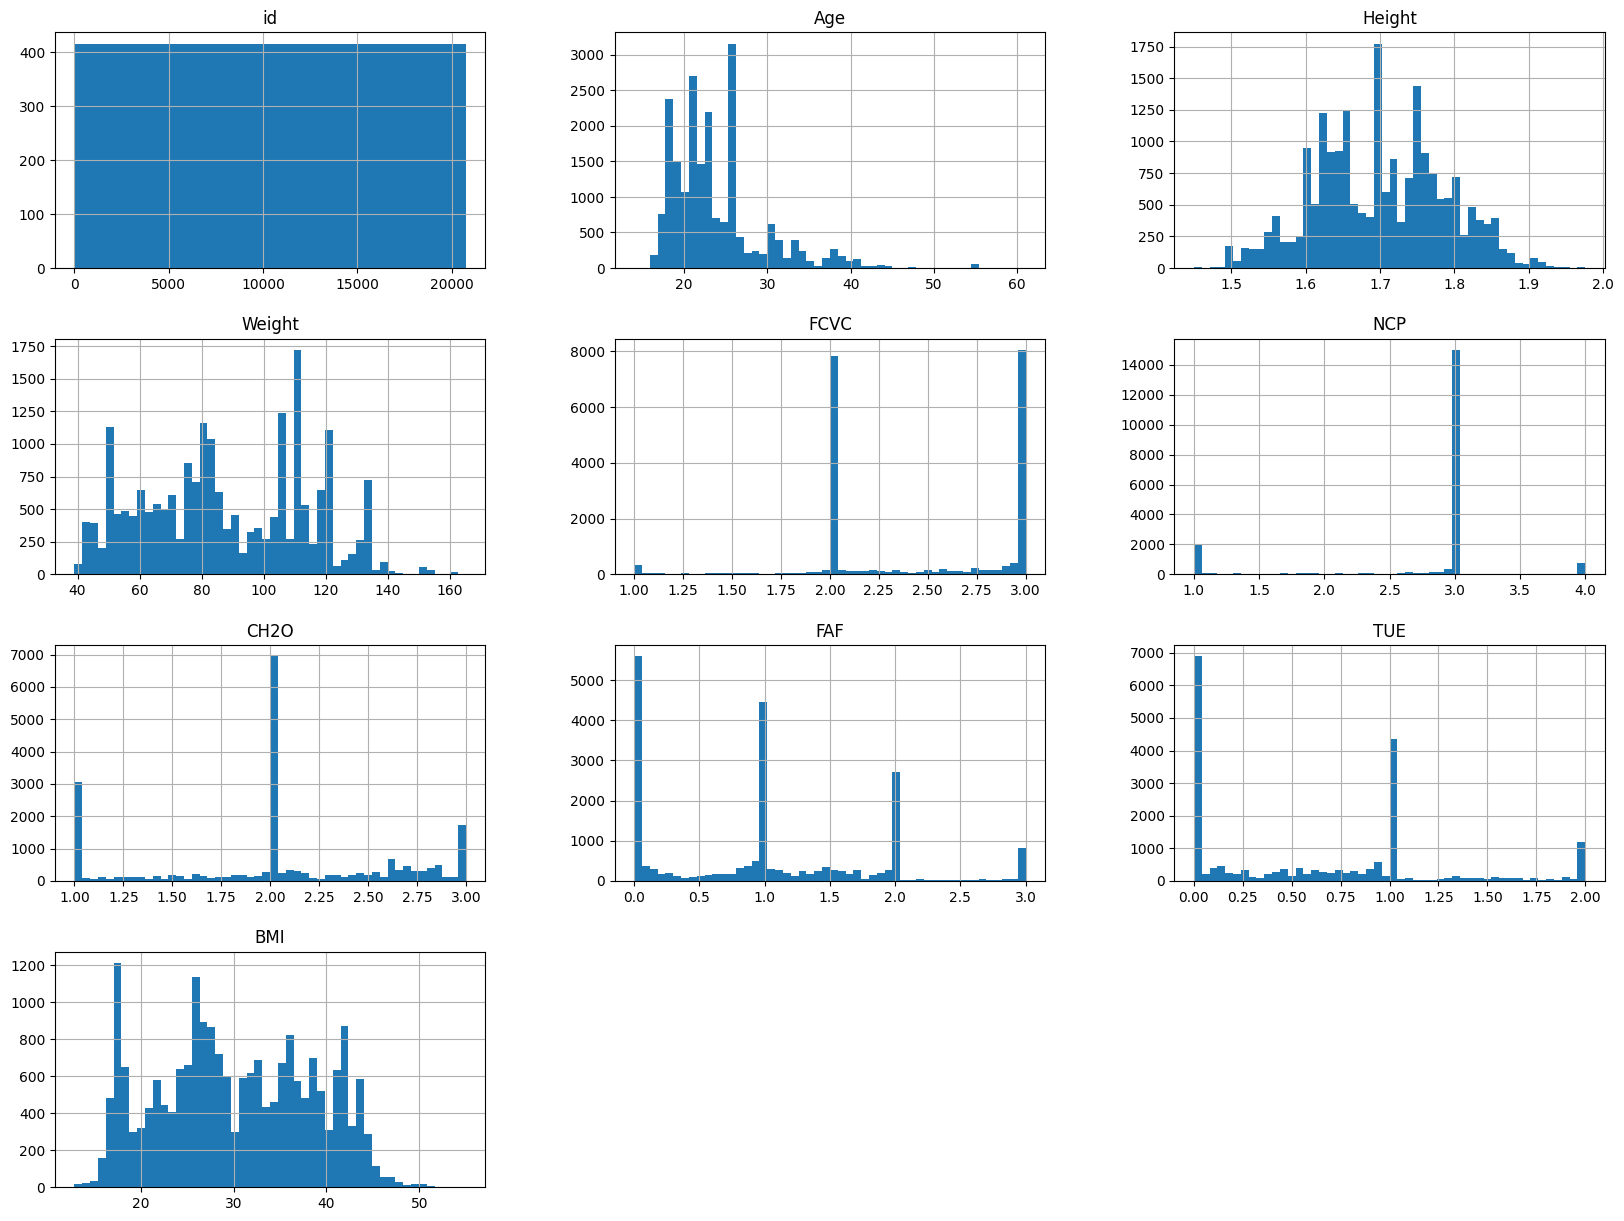

In [13]:
# Visualisasi fitur numerik untuk melihat masing-masing histogram
train.hist(bins=50, figsize=(20,15))
plt.show()

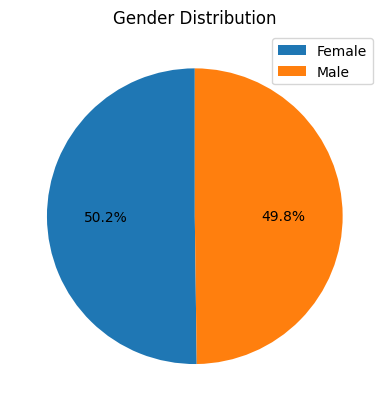

In [14]:
train["Gender"].value_counts().plot(kind="pie", startangle=90, autopct='%1.1f%%', labels=None)

plt.ylabel("")
plt.legend(train["Gender"].value_counts().index, loc="best")
plt.title("Gender Distribution")

plt.show()

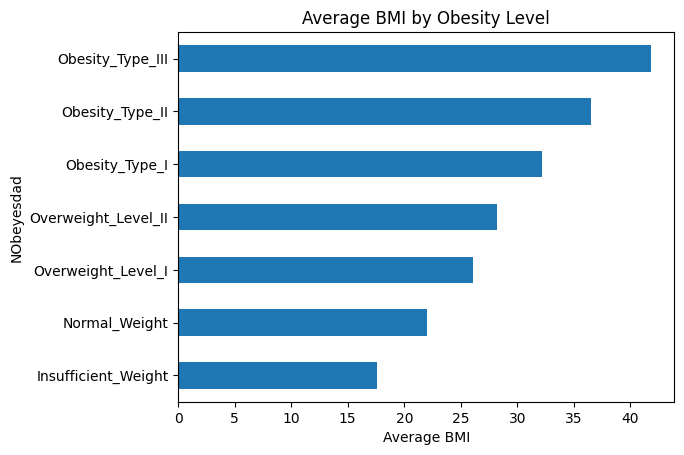

In [15]:
train.groupby("NObeyesdad")["BMI"].mean().sort_values(ascending=True).plot(kind="barh")
plt.title("Average BMI by Obesity Level")
plt.xlabel("Average BMI")
plt.show()

## Data Preparation

### Standarisasi Fitur dan Encoding Data Kategorikal

In [16]:
# subsetting the dataset into features and label
X = train.drop("NObeyesdad", axis=1).copy()
y = train["NObeyesdad"].copy()

# splitting the dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2024)

In [17]:
# select numerical columns
numerical_columns = X_train.select_dtypes("number").columns

# select categorical columns
categorical_columns = X_train.select_dtypes(exclude=["number"]).columns

# preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numerical_columns),
        ("cat", OneHotEncoder(handle_unknown="ignore"), categorical_columns)
    ]
)

# instantiate the pipeline
pipeline = Pipeline([
    ("preprocessor", preprocessor)
])

## Model Development



### Mempersiapkaan dataframe untuk analisis model

In [18]:
# transforming the training and testing features
X_train_cleaned = pipeline.fit_transform(X_train)
X_test_cleaned = pipeline.transform(X_test)

### Algoritma Decision Tree

In [22]:
# Melatih model Decision Tree
dec_tree = DecisionTreeClassifier(random_state=2024)
dec_tree.fit(X_train_cleaned, y_train)

# Membuat prediksi
y_pred_train = dec_tree.predict(X_train_cleaned)
y_pred_test = dec_tree.predict(X_test_cleaned)

# Menghitung metrik untuk data training
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Testing Metrics:
Accuracy: 0.8367052023121387
Precision: 0.8372832191136368
Recall: 0.8367052023121387
F1-score: 0.836770714622821

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.90      0.88      0.89       500
      Normal_Weight       0.77      0.80      0.79       597
     Obesity_Type_I       0.79      0.79      0.79       599
    Obesity_Type_II       0.93      0.93      0.93       668
   Obesity_Type_III       0.99      0.99      0.99       789
 Overweight_Level_I       0.70      0.65      0.68       504
Overweight_Level_II       0.67      0.71      0.69       495

           accuracy                           0.84      4152
          macro avg       0.82      0.82      0.82      4152
       weighted avg       0.84      0.84      0.84      4152



### Algorima XGBoost

In [23]:
# Melatih model XGBoost
xgb = GradientBoostingClassifier()
xgb.fit(X_train_cleaned, y_train)

# Membuat prediksi
y_pred_train = xgb.predict(X_train_cleaned)
y_pred_test = xgb.predict(X_test_cleaned)

# Menghitung metrik untuk data training
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Metrics:
Accuracy: 0.9238829338793207
Precision: 0.9236832773133827
Recall: 0.9238829338793207
F1-score: 0.9236847969464334

Testing Metrics:
Accuracy: 0.8986030828516378
Precision: 0.898116729562829
Recall: 0.8986030828516378
F1-score: 0.8982363762084005

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.93      0.93       500
      Normal_Weight       0.86      0.88      0.87       597
     Obesity_Type_I       0.88      0.89      0.88       599
    Obesity_Type_II       0.96      0.97      0.97       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.81      0.77      0.79       504
Overweight_Level_II       0.79      0.78      0.78       495

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



### RandomForestClassifier

In [24]:
# Melatih model Random Forest
random_forest = RandomForestClassifier()
random_forest.fit(X_train_cleaned, y_train)

# Membuat prediksi
y_pred_train = random_forest.predict(X_train_cleaned)
y_pred_test = random_forest.predict(X_test_cleaned)

# Menghitung metrik untuk data training
print("Training Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train))
print("Precision:", precision_score(y_train, y_pred_train, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train, average='weighted'))

print("\nTesting Metrics:")
print("Accuracy:", accuracy_score(y_test, y_pred_test))
print("Precision:", precision_score(y_test, y_pred_test, average='weighted'))
print("Recall:", recall_score(y_test, y_pred_test, average='weighted'))
print("F1-score:", f1_score(y_test, y_pred_test, average='weighted'))

# Menampilkan laporan klasifikasi lengkap
print("\nClassification Report:")
print(classification_report(y_test, y_pred_test))

Training Metrics:
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1-score: 1.0

Testing Metrics:
Accuracy: 0.896917148362235
Precision: 0.896952825740852
Recall: 0.896917148362235
F1-score: 0.8965516502313584

Classification Report:
                     precision    recall  f1-score   support

Insufficient_Weight       0.92      0.92      0.92       500
      Normal_Weight       0.84      0.89      0.86       597
     Obesity_Type_I       0.89      0.89      0.89       599
    Obesity_Type_II       0.96      0.97      0.97       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.82      0.74      0.77       504
Overweight_Level_II       0.78      0.80      0.79       495

           accuracy                           0.90      4152
          macro avg       0.89      0.89      0.89      4152
       weighted avg       0.90      0.90      0.90      4152



### Support Vector Machine (SVM)

In [ ]:

svm = SVC(kernel='rbf', random_state=2024)
svm.fit(X_train_cleaned, y_train)

y_pred_train_svm = svm.predict(X_train_cleaned)
y_pred_test_svm = svm.predict(X_test_cleaned)

print("SVM Classification Report:")
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_svm))
print("Precision:", precision_score(y_train, y_pred_train_svm, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train_svm, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train_svm, average='weighted'))
print("\nTesting Metrics:")
print(classification_report(y_test, y_pred_test_svm))

SVM Classification Report:

Training Metrics:
Accuracy: 0.9024448994339396
Precision: 0.9020276238987338
Recall: 0.9024448994339396
F1-score: 0.9021467164786908

Testing Metrics:
                     precision    recall  f1-score   support

Insufficient_Weight       0.91      0.94      0.92       500
      Normal_Weight       0.85      0.84      0.85       597
     Obesity_Type_I       0.87      0.87      0.87       599
    Obesity_Type_II       0.95      0.98      0.96       668
   Obesity_Type_III       1.00      0.99      1.00       789
 Overweight_Level_I       0.75      0.72      0.73       504
Overweight_Level_II       0.74      0.74      0.74       495

           accuracy                           0.88      4152
          macro avg       0.87      0.87      0.87      4152
       weighted avg       0.88      0.88      0.88      4152



In [31]:
# Import library yang diperlukan
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

### Logistic Regression

In [ ]:
log_reg = LogisticRegression(multi_class='multinomial', max_iter=1000)
log_reg.fit(X_train_cleaned, y_train)

y_pred_train_log = log_reg.predict(X_train_cleaned)
y_pred_test_log = log_reg.predict(X_test_cleaned)

print("\nLogistic Regression Classification Report:")
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_log))
print("Precision:", precision_score(y_train, y_pred_train_log, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train_log, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train_log, average='weighted'))
print("\nTesting Metrics:")
print(classification_report(y_test, y_pred_test_log))


Logistic Regression Classification Report:

Training Metrics:
Accuracy: 0.8683608334336986
Precision: 0.8669377764578307
Recall: 0.8683608334336986
F1-score: 0.8673587251791568

Testing Metrics:
                     precision    recall  f1-score   support

Insufficient_Weight       0.89      0.94      0.92       500
      Normal_Weight       0.85      0.83      0.84       597
     Obesity_Type_I       0.84      0.82      0.83       599
    Obesity_Type_II       0.93      0.97      0.95       668
   Obesity_Type_III       0.99      0.99      0.99       789
 Overweight_Level_I       0.75      0.71      0.73       504
Overweight_Level_II       0.70      0.70      0.70       495

           accuracy                           0.87      4152
          macro avg       0.85      0.85      0.85      4152
       weighted avg       0.86      0.87      0.86      4152



### Lightgbm

In [36]:
pip install lightgbm

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------------------------------------ --- 1.3/1.4 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 7.6 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [37]:
import lightgbm as lgb
lgb_model = lgb.LGBMClassifier()
lgb_model.fit(X_train_cleaned, y_train)

y_pred_train_lgb = lgb_model.predict(X_train_cleaned)
y_pred_test_lgb = lgb_model.predict(X_test_cleaned)

print("\nLightGBM Classification Report:")
print("\nTraining Metrics:")
print("Accuracy:", accuracy_score(y_train, y_pred_train_lgb))
print("Precision:", precision_score(y_train, y_pred_train_lgb, average='weighted'))
print("Recall:", recall_score(y_train, y_pred_train_lgb, average='weighted'))
print("F1-score:", f1_score(y_train, y_pred_train_lgb, average='weighted'))
print("\nTesting Metrics:")
print(classification_report(y_test, y_pred_test_lgb))

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001100 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2550
[LightGBM] [Info] Number of data points in the train set: 16606, number of used features: 32
[LightGBM] [Info] Start training from score -2.105183
[LightGBM] [Info] Start training from score -1.899491
[LightGBM] [Info] Start training from score -1.972084
[LightGBM] [Info] Start training from score -1.861975
[LightGBM] [Info] Start training from score -1.628958
[LightGBM] [Info] Start training from score -2.155878
[LightGBM] [Info] Start training from score -2.103207

LightGBM Classification Report:

Training Metrics:
Accuracy: 0.9889798867879079
Precision: 0.988959174180742
Recall: 0.9889798867879079
F1-score: 0.988954048494432

Testing Metrics:
                     precision    recall  f1-score   support

Insufficient_Weight     

### Evaluasi Model

- Pengembangan model prediktif obesitas dapat membantu identifikasi individu berisiko tinggi. 
- Performa terbaik: LightGBM memberikan akurasi tertinggi pada data testing dengan keseimbangan baik antara training dan testing.
- Overfitting: Decision Tree dan Random Forest cenderung overfit pada data training.
- Keandalan: XGBoost dan LightGBM lebih andal dalam mengatasi data yang kompleks.